<a href="https://colab.research.google.com/github/adibahny/UnityGaussianSplatting/blob/main/Edge_visual_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import cv2
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [8]:
from google.colab import files

print("Please upload the VR screenshot and the real photo.")
uploaded = files.upload()

print("Please upload the remaining image.")  # Prompt for the second image
uploaded_2 = files.upload() # Upload the second image

# Combine both uploaded dictionaries
uploaded.update(uploaded_2)

image_files = list(uploaded.keys())
vr_image = Image.open(image_files[0])  # Assuming the first file is the VR image
real_image = Image.open(image_files[1])  # Assuming the second file is the real photo

# Convert images to NumPy arrays
vr_array = np.array(vr_image)
real_array = np.array(real_image)

Please upload the VR screenshot and the real photo.


Saving 15mil.png to 15mil.png
Please upload the remaining image.


Saving real.jpeg to real (1).jpeg


In [9]:
if vr_array.shape != real_array.shape:
    print("Resizing images to match dimensions.")
    real_array = cv2.resize(real_array, (vr_array.shape[1], vr_array.shape[0]))


Resizing images to match dimensions.


In [10]:
vr_gray = cv2.cvtColor(vr_array, cv2.COLOR_RGB2GRAY)
real_gray = cv2.cvtColor(real_array, cv2.COLOR_RGB2GRAY)

In [11]:
vr_edges = cv2.Canny(vr_gray, 50, 150)
real_edges = cv2.Canny(real_gray, 50, 150)

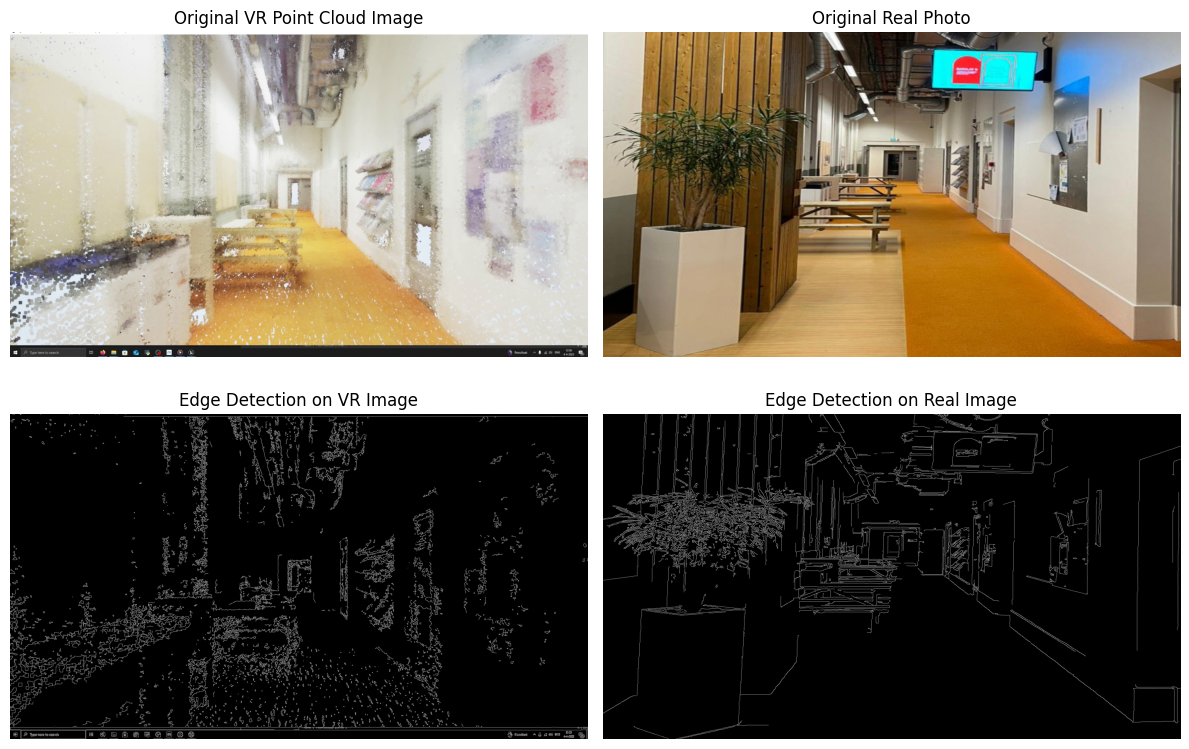

In [12]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(vr_array)
plt.title("Original VR Point Cloud Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(real_array)
plt.title("Original Real Photo")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(vr_edges, cmap="gray")
plt.title("Edge Detection on VR Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(real_edges, cmap="gray")
plt.title("Edge Detection on Real Image")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Compute SSIM
similarity, _ = ssim(vr_gray, real_gray, full=True)

# Compute Mean Squared Error (MSE)
mse = np.mean((vr_gray - real_gray) ** 2)

# Compute edge similarity using pixel-wise comparison
edge_similarity = np.mean(vr_edges == real_edges)

In [ ]:
print(f"Structural Similarity Index (SSIM): {similarity:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Edge Similarity (Proportion of Matching Pixels): {edge_similarity:.4f}")

Structural Similarity Index (SSIM): 0.4082
Mean Squared Error (MSE): 107.1352
Edge Similarity (Proportion of Matching Pixels): 0.9206


In [ ]:
cv2.imwrite("vr_edges.png", vr_edges)
cv2.imwrite("real_edges.png", real_edges)
files.download("vr_edges.png")
files.download("real_edges.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>